# Wholesale Customer

Aplicação do método Kmeans para vendas no atacado.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv")
del data["Channel"]
del data["Region"]
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [3]:
# fazendo-se a estatística descritiva
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
# Atribuindo-se os valores a outro data frame
data_array = data.values

In [5]:
# cria-se o objeto KMeans com 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=1234)
kmeans

KMeans(n_clusters=5, random_state=1234)

In [6]:
# Gera-se uma nova coluna no data frame
data["clusters"] = kmeans.fit_predict(data_array)
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,3
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,3
436,39228,1431,764,4510,93,2346,2
437,14531,15488,30243,437,14841,1867,1
438,10290,1981,2232,1038,168,2125,0


In [7]:
# Ordenando-se pelos clusters
data.sort_values(by="clusters")

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,12669,9656,7561,214,2674,1338,0
252,6623,1860,4740,7683,205,1693,0
250,3191,1993,1799,1730,234,710,0
249,8040,3795,2070,6340,918,291,0
247,13569,346,489,2077,44,659,0
...,...,...,...,...,...,...,...
333,8565,4980,67298,131,38102,1215,4
61,35942,38369,59598,3254,26701,2017,4
86,22925,73498,32114,987,20070,903,4
47,44466,54259,55571,7782,24171,6465,4


In [8]:
# Utilizando-se GroupBy do Pandas
group = data.groupby("clusters")

In [9]:
# Contabilizando-se itens por cluster
group_count = data.groupby("clusters").size().reset_index(name='counts')
group_count

,clusters,counts
0,0,226
1,1,81
2,2,21
3,3,105
4,4,7


In [10]:
# Obtendo-se os valores médios (centros) para cada cluster
group.mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
clusters,,,,,,
0,6143.871681,3276.792035,4115.163717,2438.349558,1220.703540,992.539823
1,4991.481481,12140.543210,18505.506173,1591.111111,8148.246914,1822.407407
2,50512.095238,6987.523810,6478.095238,10215.380952,1030.523810,4904.761905
3,21774.600000,3934.209524,5149.200000,4183.123810,1112.542857,1696.923810
4,20031.285714,38084.000000,56126.142857,2564.571429,27644.571429,2548.142857


<AxesSubplot:title={'center':'Consumo por Cluster'}, xlabel='clusters'>

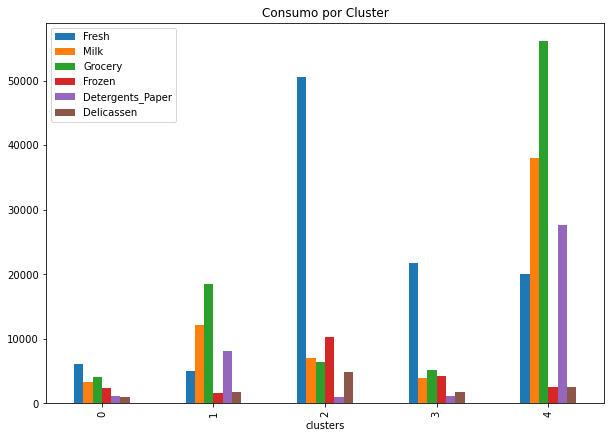

In [11]:
# Gerando-se o gráfico, mostrando as classes como conjuntos de barras, cada uma representando
# uma característica
group.mean().plot(kind="bar", figsize=(10,7), title="Consumo por Cluster")

# Conclusão

Mesmo o grupo 4 sendo o que mais consome, deve-se observar que o grupo 4 possui o menor numéro de indivíduos.
O foco da empresa deve ser aumentar as vendas do grupo 3 e aumentar a base de clientes do grupo dois.